In [289]:
import os
import librosa
import librosa.display
import json 
import importlib
import formExtractor as fem
importlib.reload(fem)
import matplotlib.pyplot as plt

In [290]:
import numpy as np
np.version.version

'2.0.2'

In [291]:
def load_audio_files(path):
    audio_files = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".mp3"):
                audio_files.append(os.path.join(root, file))
    return audio_files

In [292]:
path = '/home/laura/aimir/'
collection = 'udio' #lastfm, suno, udio
song_files = path + collection + '/audio'
files = load_audio_files(song_files)
print(len(files))

22916


In [293]:
myFiles = files[:20]

In [294]:
id = 3
song = myFiles[id]

#song = '/home/laura/aimir/boomy/audio/14065870.mp3'
id_file = song.split('/')[-1].split('.')[0]

In [295]:
# print metadata
md = path + collection + '/metadata/' + id_file + '.json'

with open(md) as json_file:
    data = json.load(json_file)
    
    # Calculate the maximum key length
    max_key_length = max(len(key) for key in data.keys())
    
    # Print each line with keys aligned
    for key in data:
        print(f"{key:{max_key_length}} : {data[key]}")

id               : bfa08458-c2df-4e17-a7ef-e9428a860076
user_id          : 7d41c591-e532-4df9-9449-0abae9ad6099
artist           : Raddishes
title            : Rutheless Roundup
created_at       : 2024-04-22T22:18:25.98063+00:00
error_id         : None
error_type       : None
generation_id    : 55be3f53-f368-42ef-a55c-aca4d05a324c
image_path       : https://imagedelivery.net/C9yUr1FL21Q6JwfYYh2ozQ/92b7eb99-3f09-4a90-24fc-0655b9a01800/public
lyrics           : [Verse]
Rollin' down them icy road, got the horde on the run,
Got my eyes on Tacos, and my hands on my gun.
Got Grasshopper jumpin', Kady by my side,
Thatcher in the back, ain't no need to hide.

[Bridge]
Gaahl's spittin' wisdom, Balowell got the flow,
Auggy bringin' heat, Elly steady on the go.
Raddishes crunchin', Deacon's preachin' loud,
Tyranika's rhymes, breakin' through the crowd.

[Verse]
Infi's beat droppin', Celenia's voice so sweet,
Hamorina's rhythm got the whole street on their feet.
DJ Mohawk mixin', Trooper holdin' i

In [296]:
formData = fem.formExtractor()

y, sr = librosa.load(song)

In [297]:
# Extract chroma features
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
# Aggregate chroma features by averaging over time
chroma_mean = np.mean(chroma, axis=1)

In [298]:
# Krumhansl-Schmuckler key profiles
major_profile = np.array([6.35, 2.23, 3.48, 2.33, 4.38, 4.09, 2.52,
                          5.19, 2.39, 3.66, 2.29, 2.88])

minor_profile = np.array([6.33, 2.68, 3.52, 5.38, 2.60, 3.53, 2.54,
                          4.75, 3.98, 2.69, 3.34, 3.17])

In [299]:
# Initialize lists to store correlation scores
correlations = []

# Iterate over all 12 keys
keys = ['C', 'C#', 'D', 'D#', 'E', 'F',
        'F#', 'G', 'G#', 'A', 'A#', 'B']
modes = ['major', 'minor']

for i, key in enumerate(keys):
    # Rotate the key profiles to match the current key
    rotated_major = np.roll(major_profile, i)
    rotated_minor = np.roll(minor_profile, i)
    
    # Compute correlations
    corr_major = np.corrcoef(chroma_mean, rotated_major)[0, 1]
    corr_minor = np.corrcoef(chroma_mean, rotated_minor)[0, 1]
    
    correlations.append((f"{key} major", corr_major))
    correlations.append((f"{key} minor", corr_minor))

# Sort keys by correlation score
correlations.sort(key=lambda x: x[1], reverse=True)

# Print top 5 key suggestions
print("Top 5 key detections:")
for key, score in correlations[:5]:
    print(f"{key}: {score:.4f}")

#get the first tonality in the list
tonality = correlations[0][0]


Top 5 key detections:
D# major: 0.6631
G minor: 0.5662
A# major: 0.5378
D# minor: 0.3952
C minor: 0.1636


In [300]:
C = formData.amplitud_to_db(y, sr, False)

In [301]:
#Example 1, calculate all the features and save them

#path = '/home/laura/aimir/suno/form/'
#K = 2
#data_dict = formData.getFormAndSave(K, song, id_file, path)

# Call the plotSpectrogram function
#plotMe.plotSpectrogram(sr, C, chords, bars, bound_frames, new_bound_segs, BINS_PER_OCTAVE, 40, 5)

#plotMe.plotWaveform(y, data_dict['sr'], data_dict['chords'], data_dict['bars'], data_dict['bound_frames'], data_dict['bound_segs'], 40, 5) #last two numbers are the size of the plot in inches

#from IPython.display import Audio
#Audio(song)

In [302]:
Csync, beats, beat_times = formData.sync(y, sr, C)

Threshold: 0.0


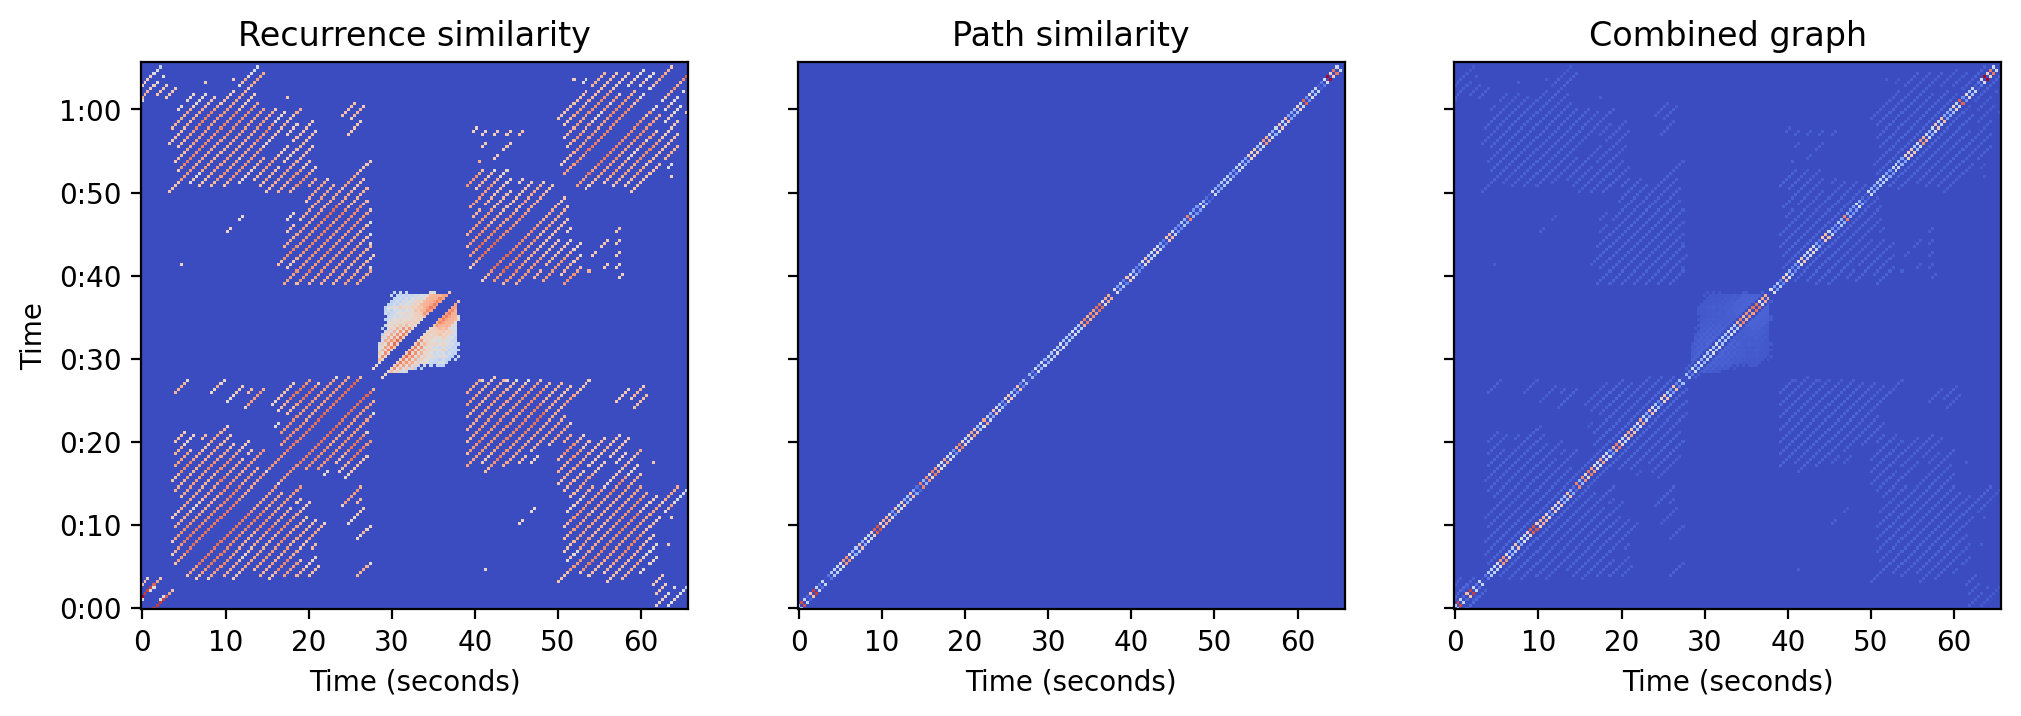

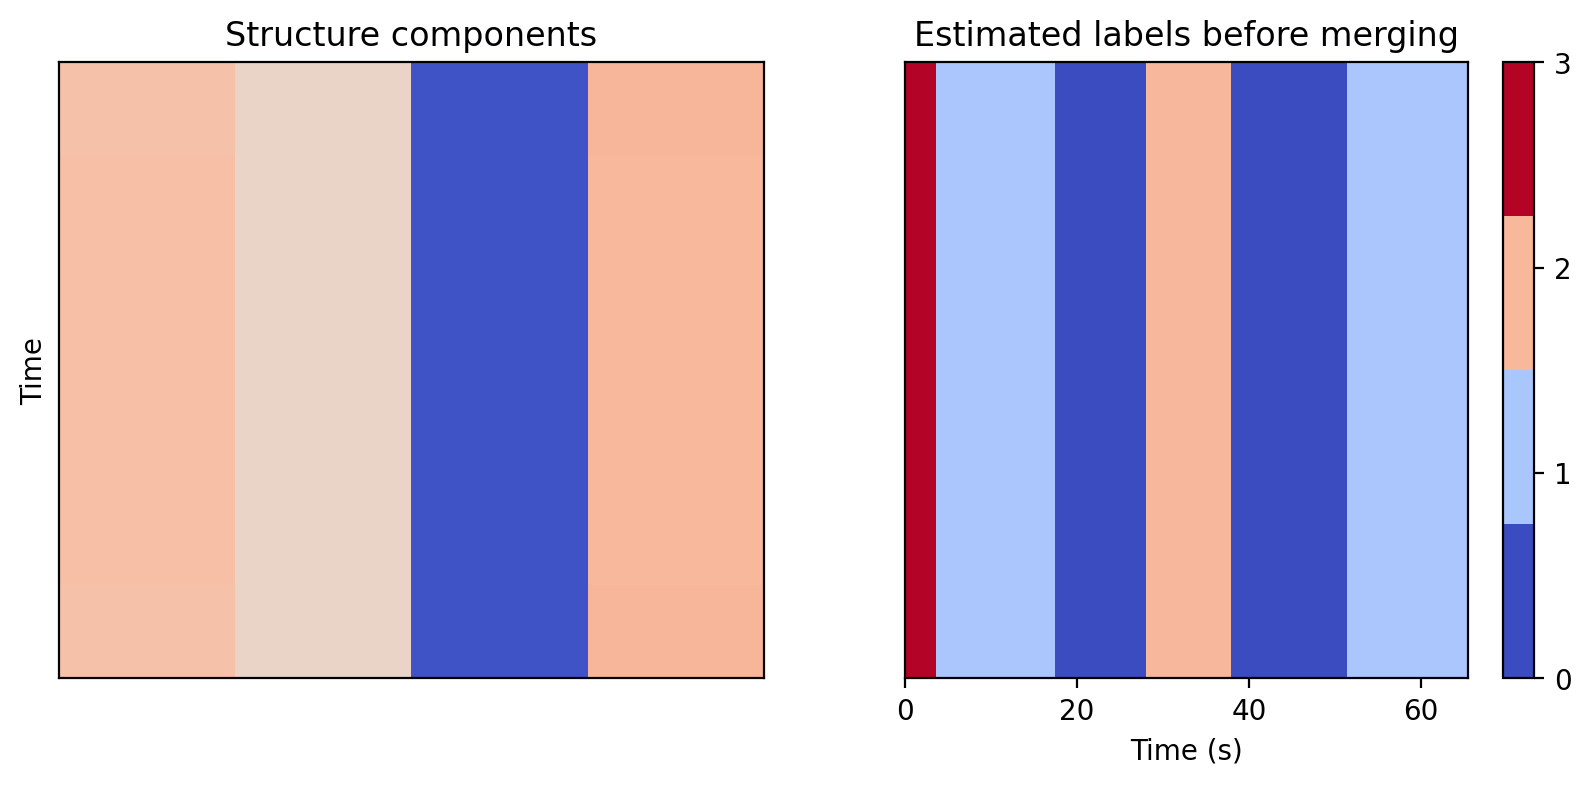

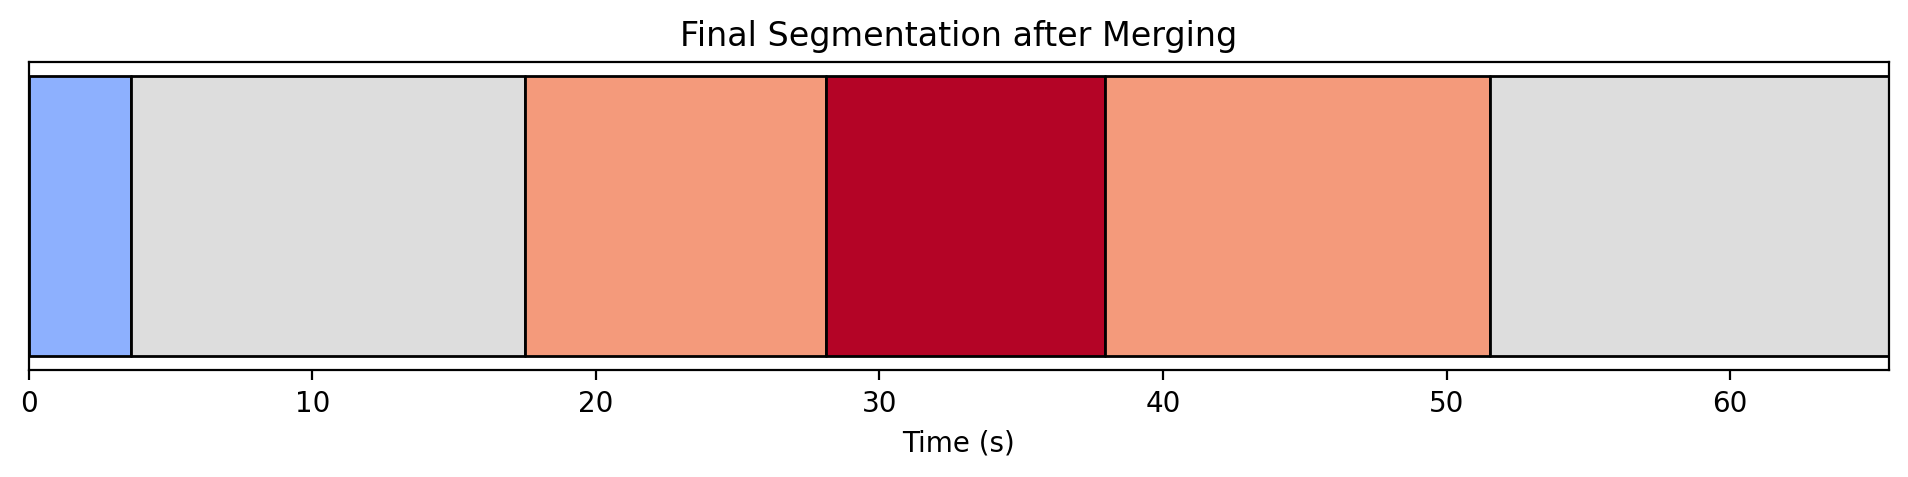

In [303]:
import formExtractor as fem

# Recreate the instance after reloading
formData = fem.formExtractor()

K = 4 #If we want k clusters, use the first k normalized eigenvectors.
min_duration = 2.5  # Minimum segment duration in seconds

#bound_frames, bound_segs = formData.laplacian(y, sr, C, Csync, beats, beat_times, K, True, 0.0) #True to plot the laplacian

bound_frames, bound_segs = formData.laplacian_2(y, sr, C, Csync, beats, beat_times, K, plotIt=True, min_duration=min_duration)

In [304]:
# Continue with your code
chord_progression = formData.getChords(song)
bars = formData.getBars(song)

print(chord_progression)
#print the chords and the bars
# for chord in chord_progression:
#     print(chord)

{'useNNLS': 1, 'rollon': 1, 'tuningmode': 1, 'whitening': 0.8, 's': 0.6, 'boostn': 0.1}
[ChordChange(chord='N', timestamp=0.371519274), ChordChange(chord='Bbmaj7', timestamp=0.464399092), ChordChange(chord='Eb7/G', timestamp=2.043356009), ChordChange(chord='Aaug', timestamp=3.065034013), ChordChange(chord='Gm6', timestamp=4.643990929), ChordChange(chord='Eb7/G', timestamp=5.851428571), ChordChange(chord='Abmaj7', timestamp=8.173424036), ChordChange(chord='Am7b5/G', timestamp=9.287981859), ChordChange(chord='Emaj7', timestamp=10.031020408), ChordChange(chord='Abmaj7', timestamp=10.681179138), ChordChange(chord='E7/G#', timestamp=11.238458049), ChordChange(chord='Cm6', timestamp=11.609977324), ChordChange(chord='C/G', timestamp=12.53877551), ChordChange(chord='N', timestamp=13.003174603), ChordChange(chord='Bbm7b5/Ab', timestamp=13.746213151), ChordChange(chord='A7', timestamp=14.767891156), ChordChange(chord='Em7b5/D', timestamp=16.718367346), ChordChange(chord='Eb7/G', timestamp=17.368

In [305]:
# Create templates for major, minor, and no-chord qualities
maj_template = np.array([1,0,0, 0,1,0, 0,1,0, 0,0,0])
min_template = np.array([1,0,0, 1,0,0, 0,1,0, 0,0,0])
N_template   = np.array([1,1,1, 1,1,1, 1,1,1, 1,1,1.]) / 4.
    
labels = ['C', 'C#', 'D', 'D#', 'E', 'F',
            'F#', 'G', 'G#', 'A', 'A#', 'B',
            'Cm', 'C#m', 'Dm', 'D#m', 'Em', 'Fm',
            'F#m', 'Gm', 'G#m', 'Am', 'A#m', 'Bm',
            'N']

In [306]:
# Generate the weighting matrix that maps chroma to labels
weights = np.zeros((25, 12), dtype=float)

for c in range(12):
    weights[c, :] = np.roll(maj_template, c) # c:maj
    weights[c + 12, :] = np.roll(min_template, c)  # c:min
weights[-1] = N_template  # the last row is the no-chord class
# Make a self-loop transition matrix over 25 states
trans = librosa.sequence.transition_loop(25, 0.99)

y, sr = librosa.load(song)
# Suppress percussive elements
y = librosa.effects.harmonic(y, margin=1)
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
# Map chroma (observations) to class (state) likelihoods
probs = np.exp(weights.dot(chroma))  # P[class | chroma] ~= exp(template' chroma)
probs /= probs.sum(axis=0, keepdims=True)  # probabilities must sum to 1 in each column
# Compute independent frame-wise estimates
#chords_ind = np.argmax(probs, axis=0)
# And viterbi estimates
chords_vit = librosa.sequence.viterbi_discriminative(probs, trans)
#convert the viterbi estimates to chord names
chord_list = [labels[chord] for chord in chords_vit]

#print timestamps
times = librosa.times_like(chords_vit)

#unify in a tuple(chord symbol, timestamp)
cp = list(zip(chord_list, times))

# Filtered chord progression
filtered_cp = []

# Iterate through the original chord progression
for i, (chord, timestamp) in enumerate(cp):
    # Add the first chord or if the current chord is different from the last added chord
    if i == 0 or chord != cp[i-1][0]:
        filtered_cp.append((chord, float(timestamp)))

print(filtered_cp)


[('Gm', 0.0), ('G#m', 9.613061224489796), ('Gm', 11.029478458049887), ('G#m', 12.654875283446712), ('Gm', 14.396371882086168)]


In [307]:
from collections import namedtuple

# Define the named tuple structure for ChordChange
ChordChange = namedtuple('ChordChange', ['chord', 'timestamp'])

# Convert to list of ChordChange named tuples
chord_changes = [ChordChange(chord=chord, timestamp=timestamp) for chord, timestamp in filtered_cp]

# Print the result
print(chord_changes)


[ChordChange(chord='Gm', timestamp=0.0), ChordChange(chord='G#m', timestamp=9.613061224489796), ChordChange(chord='Gm', timestamp=11.029478458049887), ChordChange(chord='G#m', timestamp=12.654875283446712), ChordChange(chord='Gm', timestamp=14.396371882086168)]


In [308]:
data_dict = formData.populateDict(sr, chord_changes, bars, bound_frames, bound_segs)

Plot the Song Form

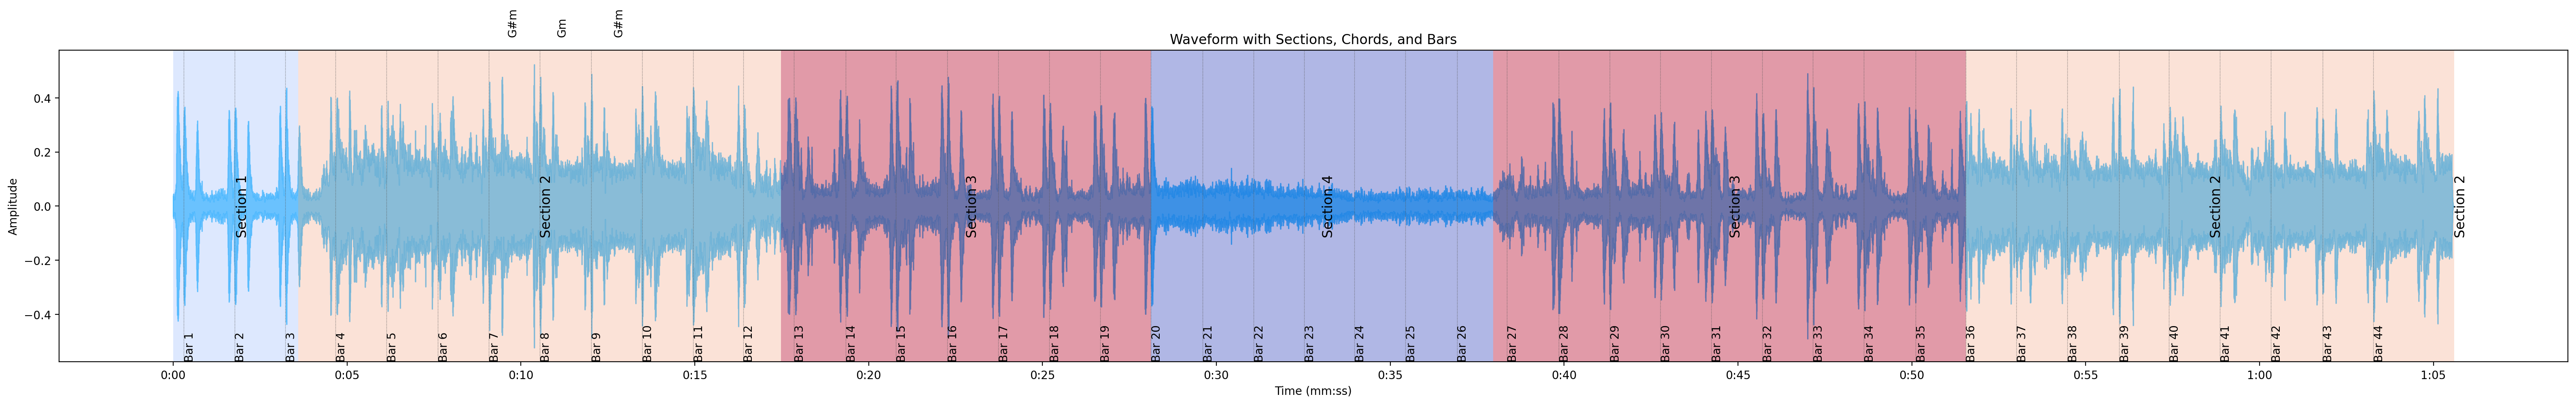

In [309]:
import plotMe
importlib.reload(plotMe)

# Call the plotSpectrogram function
#plotMe.plotSpectrogram(sr, C, chords, bars, bound_frames, new_bound_segs, BINS_PER_OCTAVE, 40, 5)

plotMe.plotWaveform(y, data_dict['sr'], data_dict['chords'], data_dict['bars'], data_dict['bound_frames'], data_dict['bound_segs'], 40, 5, 'coolwarm') #last two numbers are the size of the plot in inches

from IPython.display import Audio
Audio(song)

In [310]:
#The array contains a dictionary [ChordChange(chord='N', timestamp=0.371519274), ChordChange(chord='C#m', timestamp=0.464399092), print only the chord
print([chord.chord for chord in chord_progression])

['N', 'Bbmaj7', 'Eb7/G', 'Aaug', 'Gm6', 'Eb7/G', 'Abmaj7', 'Am7b5/G', 'Emaj7', 'Abmaj7', 'E7/G#', 'Cm6', 'C/G', 'N', 'Bbm7b5/Ab', 'A7', 'Em7b5/D', 'Eb7/G', 'Gm6', 'Eb/G', 'Gm6', 'Am', 'Bb7', 'Amaj7', 'Cm7b5/Bb', 'A7', 'Am', 'F7/A', 'C7', 'Gm', 'F#', 'Cm', 'Ebmaj7', 'F#6', 'G/A', 'Eb7/G', 'Gm6', 'Ebmaj7', 'Amaj7', 'Adim', 'Em7b5/D', 'Ebmaj7', 'F7/A', 'Ebmaj7', 'Am7b5', 'Eb7/G', 'A/G', 'N', 'E/G#', 'Eb7/G', 'C/G', 'Gm6', 'Am7b5/G', 'Gm', 'Abmaj7', 'N']


In [311]:
#print the chords only
thisChord = [chord.chord for chord in chord_progression]
thisTimestamp = [chord.timestamp for chord in chord_progression]
print(len(thisChord), len(thisTimestamp))

#align both lists
final_CP = list(zip(thisChord, thisTimestamp))
print(final_CP)

56 56
[('N', 0.371519274), ('Bbmaj7', 0.464399092), ('Eb7/G', 2.043356009), ('Aaug', 3.065034013), ('Gm6', 4.643990929), ('Eb7/G', 5.851428571), ('Abmaj7', 8.173424036), ('Am7b5/G', 9.287981859), ('Emaj7', 10.031020408), ('Abmaj7', 10.681179138), ('E7/G#', 11.238458049), ('Cm6', 11.609977324), ('C/G', 12.53877551), ('N', 13.003174603), ('Bbm7b5/Ab', 13.746213151), ('A7', 14.767891156), ('Em7b5/D', 16.718367346), ('Eb7/G', 17.368526077), ('Gm6', 18.390204081), ('Eb/G', 18.854603174), ('Gm6', 19.78340136), ('Am', 22.848435374), ('Bb7', 23.219954648), ('Amaj7', 23.962993197), ('Cm7b5/Bb', 24.520272108), ('A7', 24.984671201), ('Am', 25.820589569), ('F7/A', 26.192108843), ('C7', 26.935147392), ('Gm', 28.421224489), ('F#', 35.015691609), ('Cm', 36.780408163), ('Ebmaj7', 37.337687074), ('F#6', 39.009523809), ('G/A', 39.473922902), ('Eb7/G', 40.309841269), ('Gm6', 40.774240362), ('Ebmaj7', 42.446077097), ('Amaj7', 44.86095238), ('Adim', 45.232471655), ('Em7b5/D', 45.975510204), ('Ebmaj7', 46.9

In [312]:
#plotMe.plotSections(y, data_dict['sr'], data_dict['chords'], data_dict['bars'], data_dict['bound_frames'], data_dict['bound_segs'], 20, 5, 64) #20 and 5 are the size of the plot in inches, and 32 is the number of bars to plot

In [313]:
#plotMe.plotChordsBars(data_dict['chords'], data_dict['bars'], data_dict['bound_frames'], data_dict['bound_segs'])

In [314]:
# Compute the chroma features using CQT
chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)

# Sum chroma features over time to emphasize prominent pitches
chroma_vector = np.sum(chroma_cq, axis=1)
chroma_vector /= np.linalg.norm(chroma_vector)

# Modified Krumhansl-Schmuckler key profiles
major_profile = np.array([6.35, 2.23, 3.48, 2.33, 4.38, 4.09,
                          2.52, 5.19, 2.39, 3.66, 2.29, 2.88])
minor_profile = np.array([6.33, 2.68, 3.52, 5.38, 2.60, 3.53,
                          2.54, 4.75, 3.98, 2.69, 3.34, 3.17])

# Optionally adjust profiles
# minor_profile[0] *= 1.2  # Emphasize tonic in minor

# Normalize the profiles
major_profile /= np.linalg.norm(major_profile)
minor_profile /= np.linalg.norm(minor_profile)

key_names = ['C', 'C#', 'D', 'D#', 'E', 'F',
             'F#', 'G', 'G#', 'A', 'A#', 'B']
correlations = []

for i in range(12):
    # Rotate the key profiles
    major_profile_rotated = np.roll(major_profile, i)
    minor_profile_rotated = np.roll(minor_profile, i)

    # Compute the correlation with adjusted weights
    major_corr = np.dot(chroma_vector, major_profile_rotated) * 0.9
    minor_corr = np.dot(chroma_vector, minor_profile_rotated) * 1.1  # Increase minor influence

    correlations.append({
        'key': key_names[i],
        'mode': 'major',
        'correlation': major_corr
    })
    correlations.append({
        'key': key_names[i],
        'mode': 'minor',
        'correlation': minor_corr
    })

# Find the best matching key
best_match = max(correlations, key=lambda x: x['correlation'])
tonality = f"{best_match['key']} {best_match['mode']}"
print(f"Tonality: {tonality}")

# Sort correlations in descending order
correlations_sorted = sorted(correlations, key=lambda x: x['correlation'], reverse=True)
print("Correlation scores for all keys:")
for corr in correlations_sorted:
    print(f"{corr['key']} {corr['mode']}: {corr['correlation']:.4f}")


Tonality: G minor
Correlation scores for all keys:
G minor: 1.0272
G# minor: 0.9650
C minor: 0.9535
A# minor: 0.9475
A minor: 0.9409
B minor: 0.9379
D minor: 0.9345
E minor: 0.9314
D# minor: 0.9251
F minor: 0.9238
F# minor: 0.9232
C# minor: 0.9006
D# major: 0.8078
G major: 0.7910
A# major: 0.7840
D major: 0.7756
G# major: 0.7684
F major: 0.7537
C major: 0.7501
A major: 0.7409
C# major: 0.7403
F# major: 0.7397
E major: 0.7366
B major: 0.7235


In [315]:
from music21 import key, harmony, roman
from IPython.display import Audio

# Define the key context explicitly as C major
mykey = tonality.split(' ')[0]
mymode = tonality.split(' ')[1]
print(mykey, mymode)
song_key = key.Key(mykey, mymode)

#print(f"Key: {song_key.tonic.name} {song_key.mode}")

#The array contains a dictionary [ChordChange(chord='N', timestamp=0.371519274), ChordChange(chord='C#m', timestamp=0.464399092), save the tuple with the function and its location in the timestamp
functional_harmony = []

for chord_name, timestamp in (filtered_cp):
    if chord_name == 'N':
        # Skip any chords labeled as N
        functional_harmony.append(('N', timestamp))
        continue
    else:   
        # Create a ChordSymbol object to correctly interpret chord qualities
        chord_symbol = harmony.ChordSymbol(chord_name)
        
        # Convert the chord symbol to a Roman numeral based on the key
        roman_numeral = roman.romanNumeralFromChord(chord_symbol, song_key)
     
        # Append the Roman numeral and timestamp to the list
        functional_harmony.append((roman_numeral.figure, timestamp))
   
print(functional_harmony)

from IPython.display import Audio
Audio(song)

G minor
[('i', 0.0), ('#i', 9.613061224489796), ('i', 11.029478458049887), ('#i', 12.654875283446712), ('i', 14.396371882086168)]


In [316]:
#get the name of folder where the data will be saved
myFolder = os.getcwd().split('src')[0]
thisPath = myFolder + collection + '/'
formData.saveData(data_dict, id_file, thisPath, tonality, functional_harmony)

In [317]:
#compare final_CP and filtered_cp by aligning its timestamps
final = []
limit = 0.25 # Define the time limit for alignment

# Loop through each chord and timestamp in filtered_cp
for chord, timestamp in filtered_cp:
    match_found = False  # To check if a match is found within the limit
    
    # Loop through each chord and timestamp in final_CP
    for chord2, timestamp2 in final_CP:
        # Check if the timestamp2 is within the range defined by 'limit'
        if timestamp - limit < timestamp2 < timestamp + limit:
            final.append((chord, chord2, timestamp))
            match_found = True  # A match is found, no need to add 'N'
            break  # Exit the inner loop when a match is found
    
    # If no match was found in the inner loop, append 'N' as the second chord
    if not match_found:
        final.append((chord, 'N', timestamp))

# Print the final aligned chord list
for element in final:
    print(element)


('Gm', 'N', 0.0)
('G#m', 'N', 9.613061224489796)
('Gm', 'E7/G#', 11.029478458049887)
('G#m', 'C/G', 12.654875283446712)
('Gm', 'N', 14.396371882086168)


/tmp/ipykernel_215331/3748616781.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


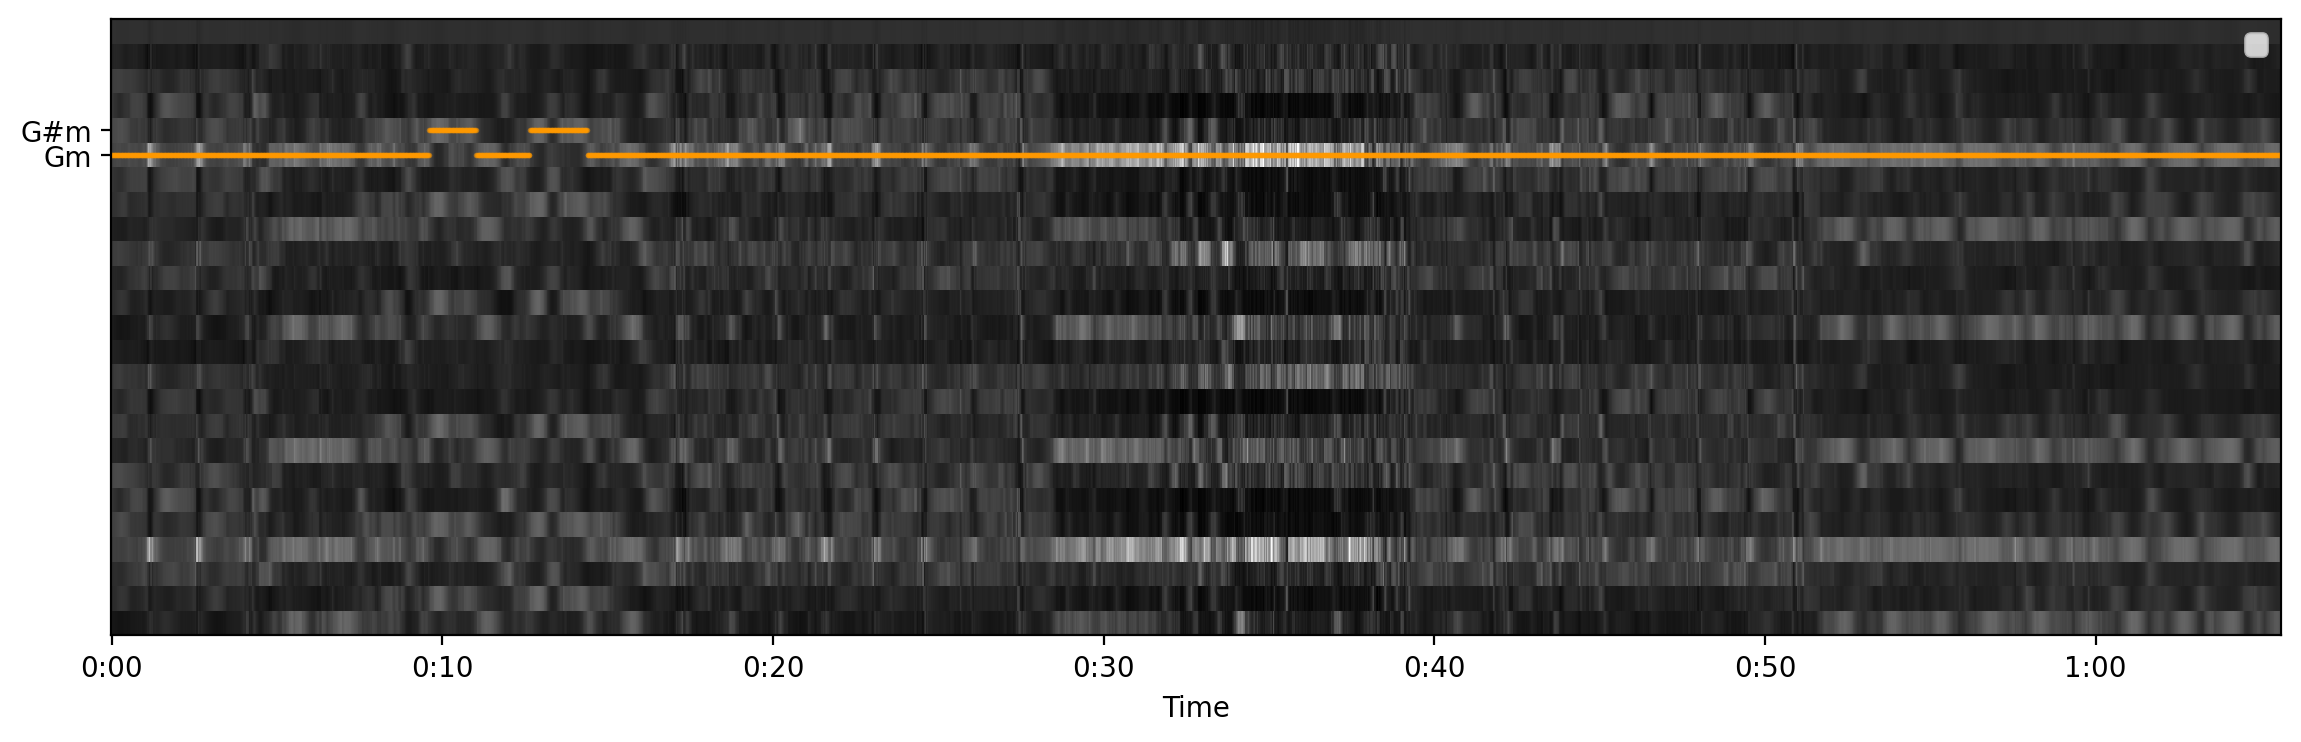

In [318]:
# And plot the results
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (14,4)
fontsize=20
librosa.display.specshow(probs, x_axis='time', cmap='gray', ax=ax)
times = librosa.times_like(chords_vit)
ax.scatter(times, chords_vit, color='#ff9900', alpha=0.5, marker='o', s=1)
ax.set(yticks=np.unique(chords_vit), yticklabels=[labels[i] for i in np.unique(chords_vit)])
ax.legend()